In [1]:
import functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileName = 'W_A1_0_3.jpg'

In [3]:
img = cv2.imread(f'./sourceImages/{fileName}')

In [4]:
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
# hist, bin_edges = np.histogram(grayImg.flatten(), bins=range(256), density=True)
# newScale = 255 * np.cumsum(hist)
# newScale = np.concatenate([newScale, [newScale[-1]]], axis=0)
# newScale = newScale.astype(np.uint8)

# img = newScale[grayImg]

In [5]:
img_1 = grayImg

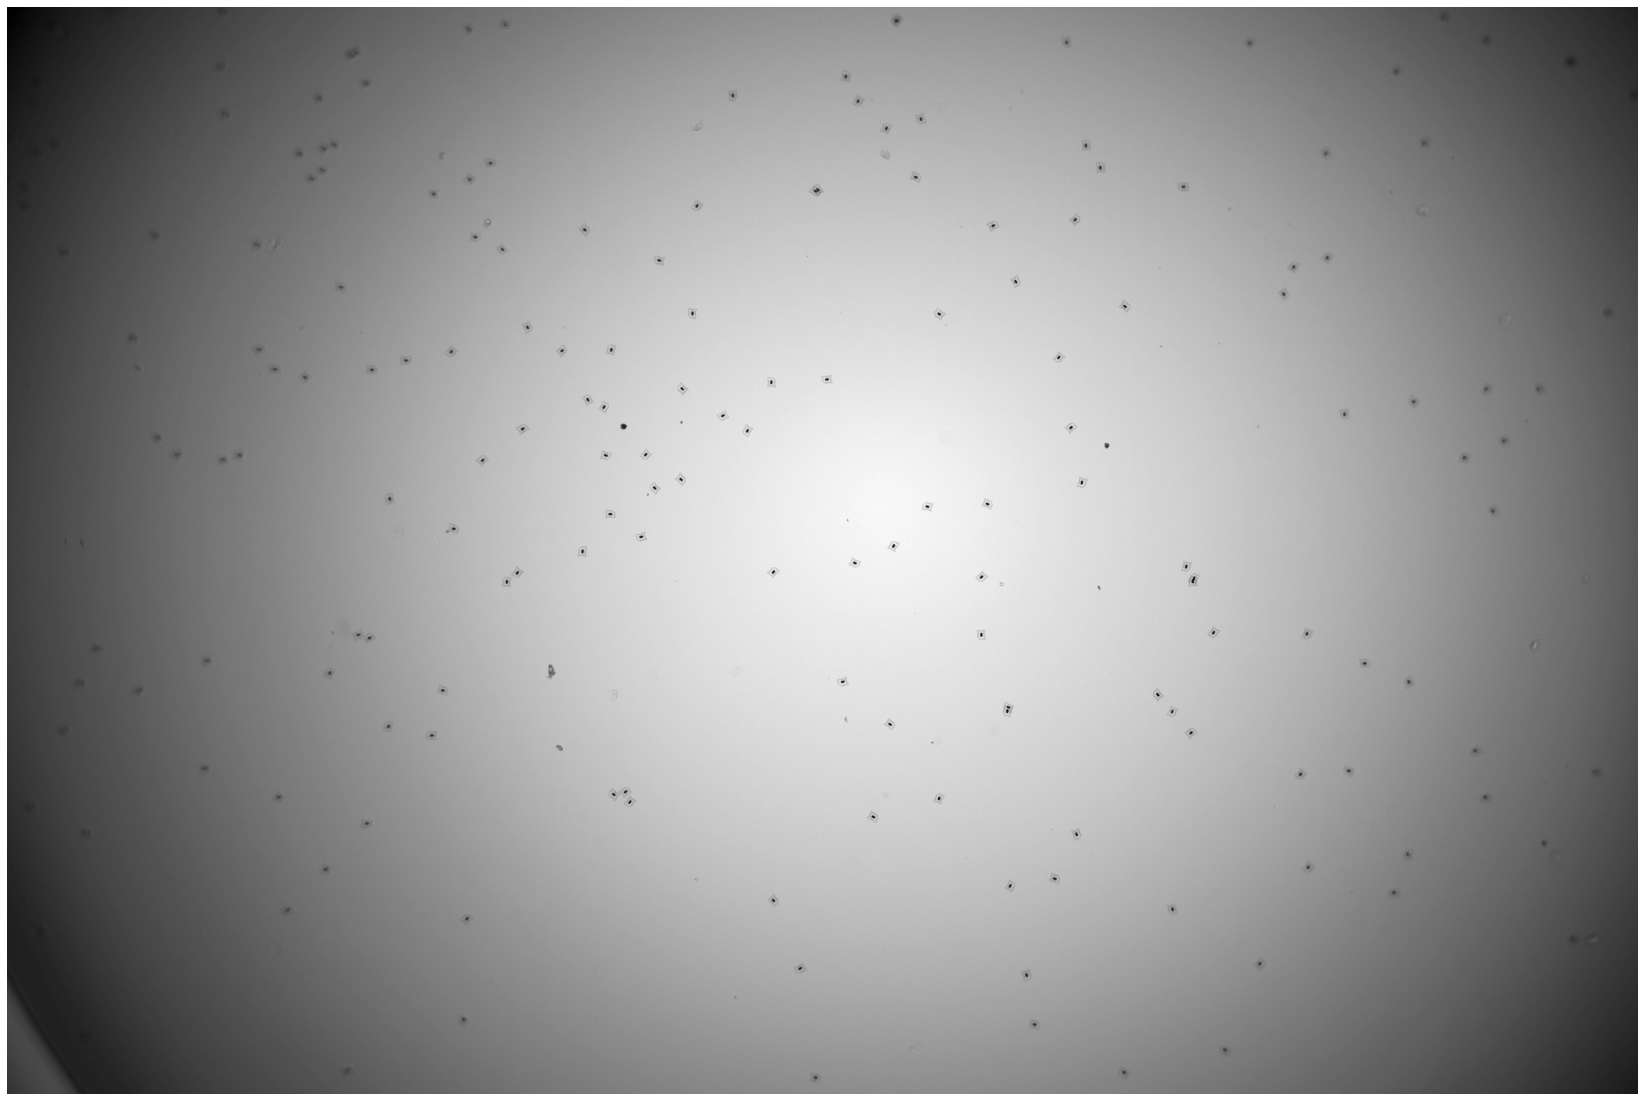

In [19]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_1, cmap='gray')

In [7]:
img_2 = functions.adaptiveThreshold(img_1, kernalSize = 111, offset=-3)

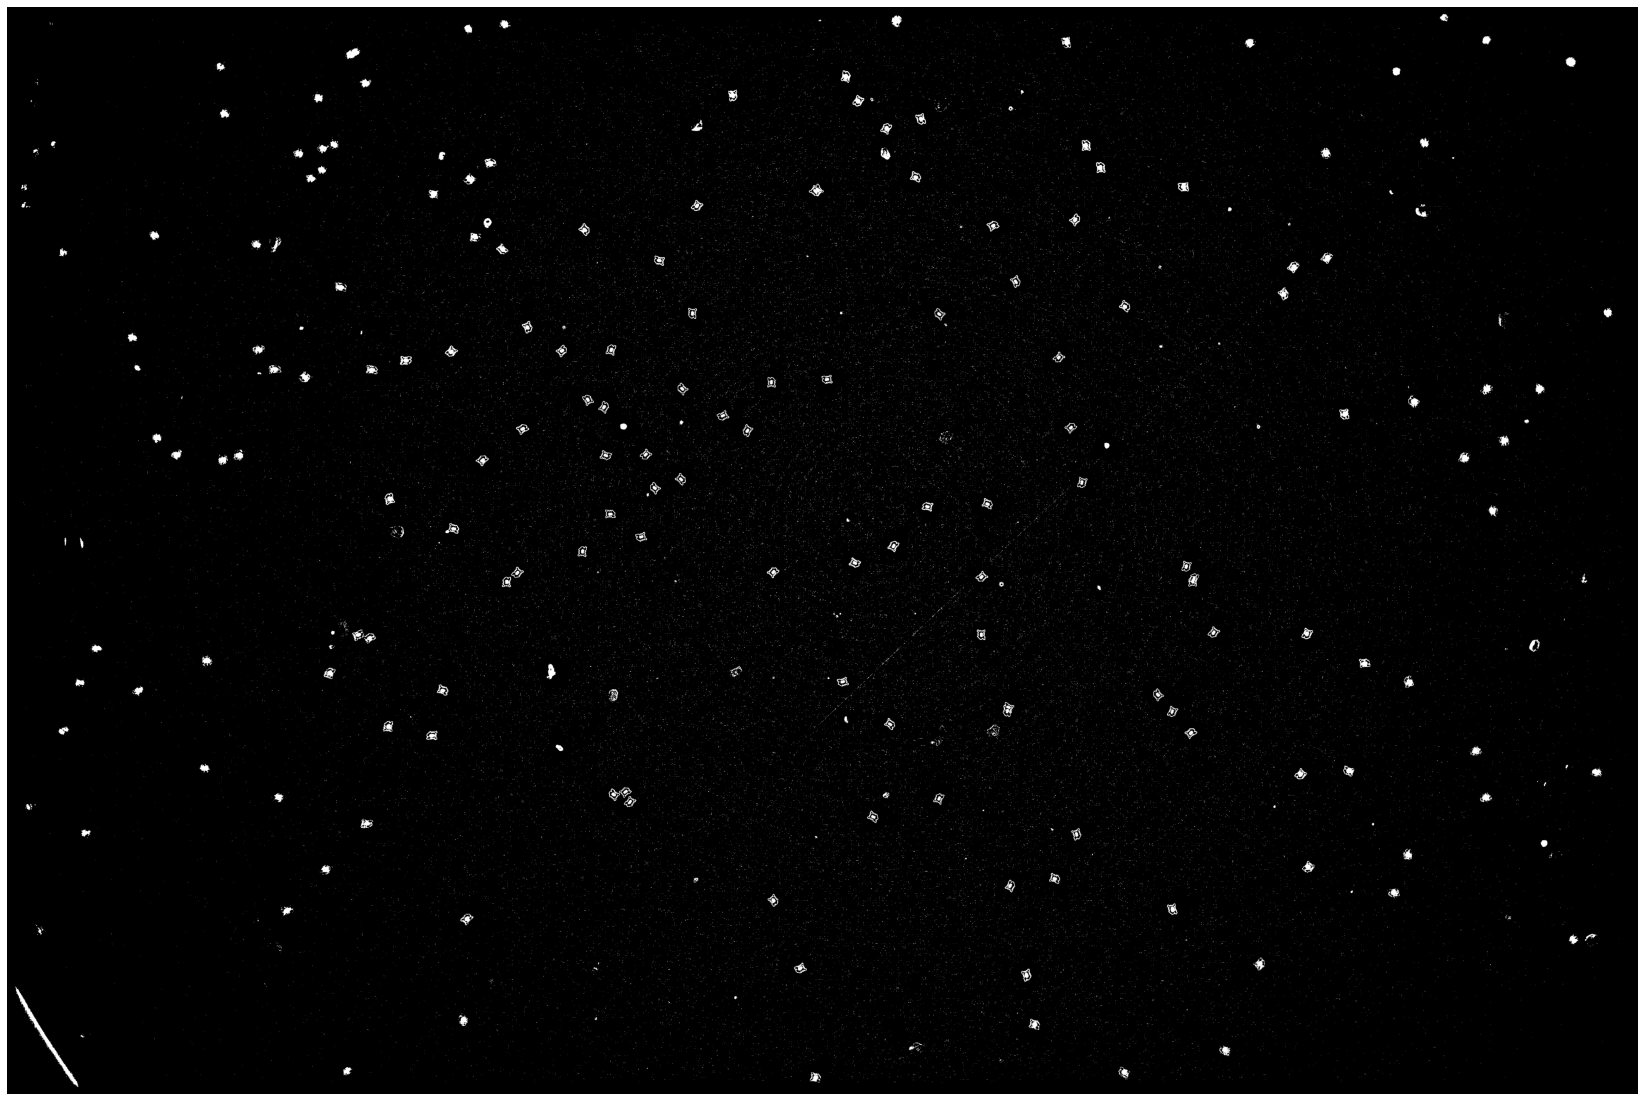

In [20]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_2, cmap='gray')

In [9]:
img_3 = cv2.erode(img_2, np.ones([7, 7]))

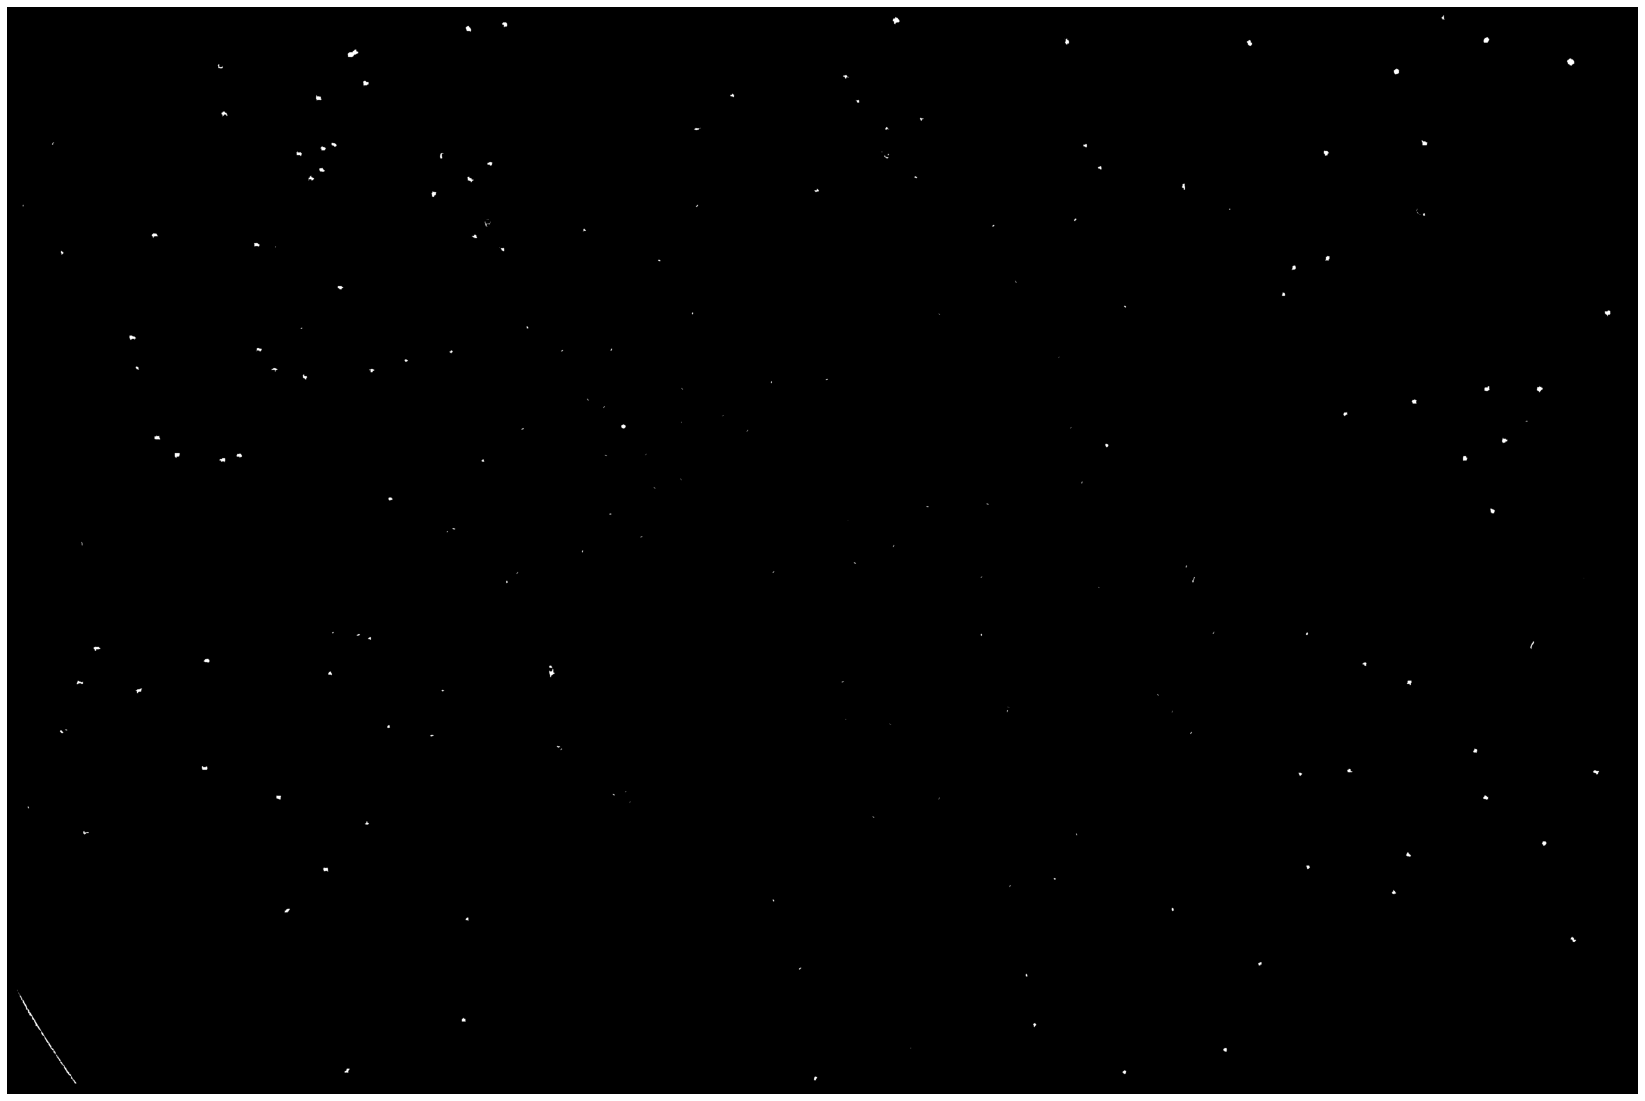

In [21]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_3, cmap='gray')

In [11]:
img_4 = cv2.dilate(img_3, np.ones([7, 7]), iterations=3)

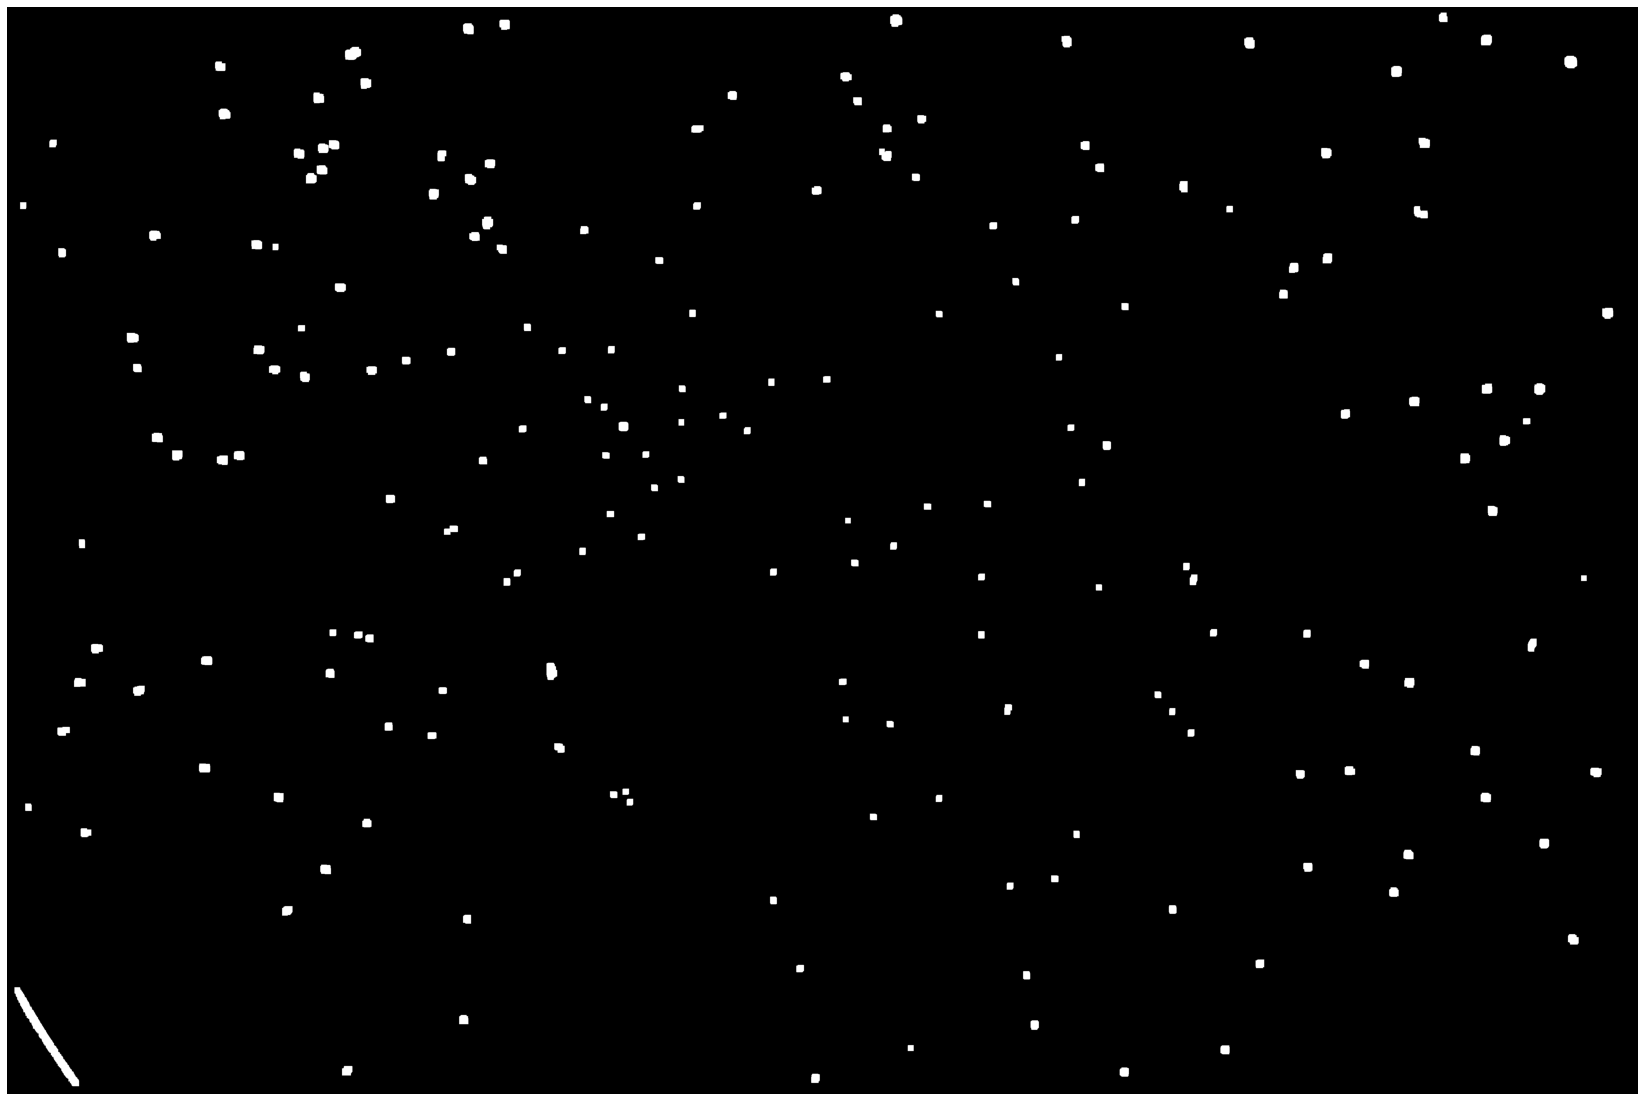

In [22]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_4, cmap='gray')

In [13]:
labels = functions.connectedComponents(img_4)

uni, cnt = np.unique(labels, return_counts=True)

In [14]:
img_5 = np.zeros(img_4.shape, dtype=np.uint8)
img_5[labels > 0] = 1
img_5[labels == uni[np.argmax(cnt[1:]) + 1]] = 0

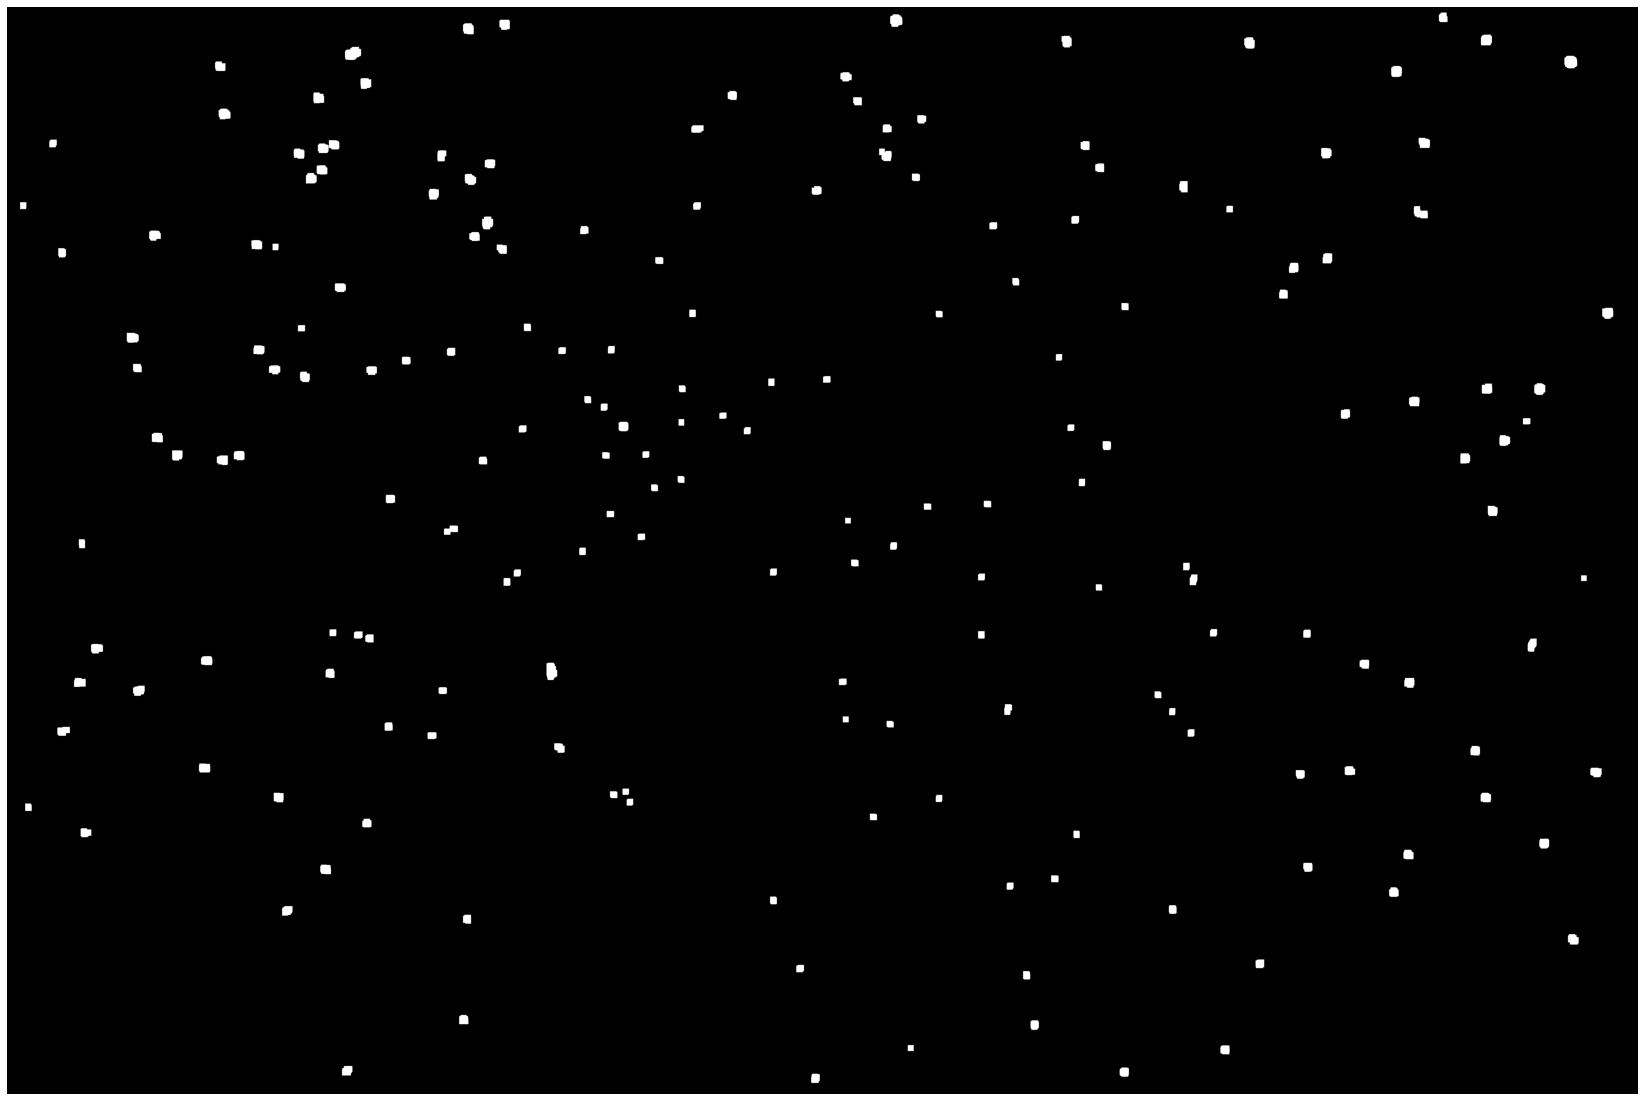

In [23]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_5, cmap='gray')

In [16]:
img_6 = cv2.cvtColor(np.logical_not(img_5).astype(np.uint8)*255, cv2.COLOR_GRAY2BGR)

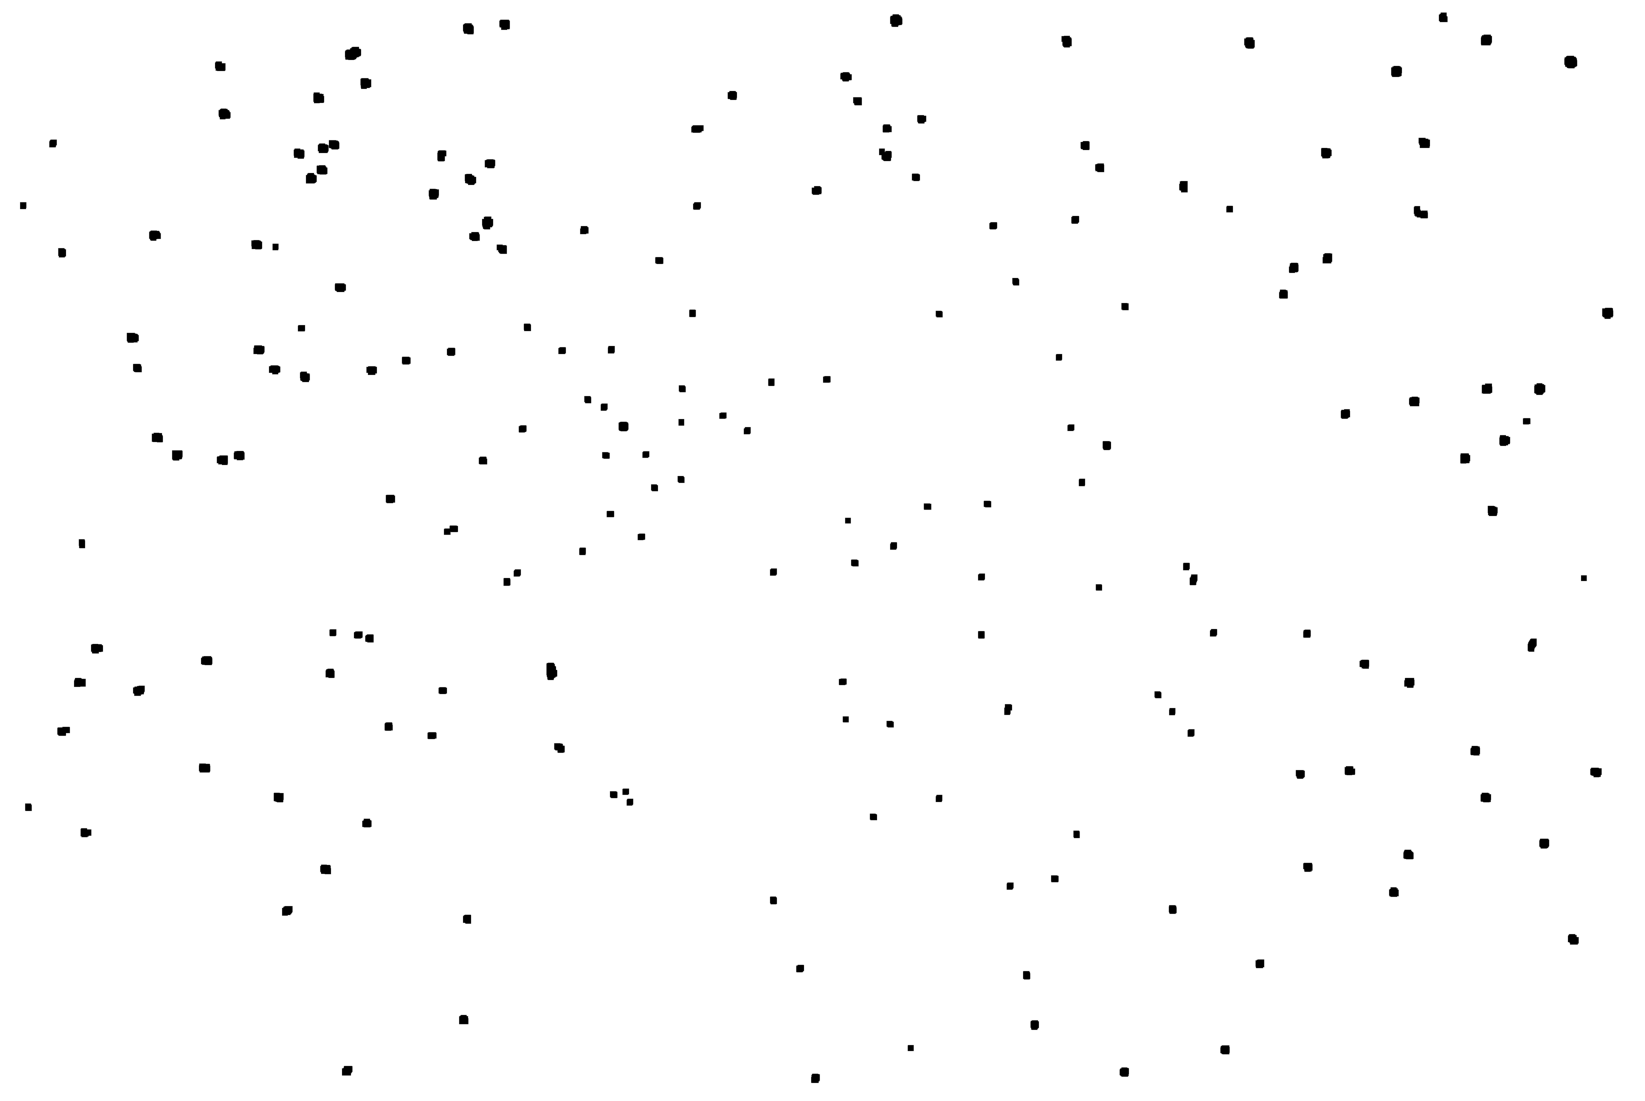

In [24]:
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.imshow(img_6, cmap='gray')

In [ ]:
cv2.imwrite(f'./resultImages/{fileName}', img_6)